In [1]:
!gdown --id 1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 185kB/s]


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!mv kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tusharpaul2001/house-price-prediction

Dataset URL: https://www.kaggle.com/datasets/tusharpaul2001/house-price-prediction
License(s): CC0-1.0
  0% 0.00/269k [00:00<?, ?B/s]
100% 269k/269k [00:00<00:00, 1.00GB/s]


In [6]:
!unzip house-price-prediction.zip

Archive:  house-price-prediction.zip
  inflating: Bangalore.csv           
  inflating: Chennai.csv             
  inflating: Delhi.csv               
  inflating: Hyderabad.csv           
  inflating: Kolkata.csv             
  inflating: Mumbai.csv              


In [7]:
import os

os.listdir()

['.config',
 'Mumbai.csv',
 'Kolkata.csv',
 'Delhi.csv',
 'Hyderabad.csv',
 'Bangalore.csv',
 'Chennai.csv',
 'house-price-prediction.zip',
 'sample_data']

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score


In [8]:
csv_files = [f for f in os.listdir() if f.endswith(".csv")]

In [9]:
df_list = [pd.read_csv(file) for file in csv_files]

data = pd.concat(df_list,ignore_index=True)

In [10]:
data


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,7834999,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,2408000,740,Ambattur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,5500000,1700,Pallikaranai VGP Shanti Nagar,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,3400000,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


### 1. How many rows and columns are in the dataset?

In [ ]:
data.shape

(32963, 40)

### 2. How many missing values exist?

In [ ]:
data.isnull().sum()

,0
Price,0
Area,0
Location,0
No. of Bedrooms,0
Resale,0
MaintenanceStaff,0
Gymnasium,0
SwimmingPool,0
LandscapedGardens,0
JoggingTrack,0


###3. Are there duplicate property listings?

In [ ]:
data.duplicated().sum()

np.int64(3828)

In [ ]:

data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

###4. What are the top 5 most common locations?

In [ ]:
data['Location'].value_counts().sort_values(ascending=False).head(5)

,count
Location,
New Town,687
Kharghar,566
Thane West,503
Mira Road East,453
Rajarhat,403


### 5. How can we convert raw price values into readable currency format like Lakhs and Crores?

In [ ]:
conditon = [
    data['Price'] >= 1e7,
    data['Price'] >= 1e5
    ]

In [ ]:
choice = [
    (data['Price'] / 1e7).round(2).astype(str) + 'Cr',
    (data['Price'] / 1e5).round(2).astype(str) + 'Lakh'
]

In [ ]:
data['price_f'] = np.select(conditon,choice,default=data['Price'].astype(str))


In [ ]:
data['price_f']

,price_f
0,48.5Lakh
1,45.0Lakh
2,67.0Lakh
3,45.0Lakh
4,50.0Lakh
...,...
32958,78.35Lakh
32959,24.08Lakh
32960,55.0Lakh
32961,34.0Lakh


###6. Which Locations House prices appear most frequently in the dataset?

In [ ]:
data.groupby('Location')['price_f'].value_counts().head(5)


,,count
Location,price_f,
1 Lane Johri Farm,1.88Cr,1
10 Sector Dwarka,1.2Cr,2
15th Road,3.5Cr,1
200 Feet Radial Road,52.85Lakh,1
3 Dwarka Sector 9 Road,43.0Lakh,1


###7. Which locations have the highest average price?

In [ ]:
data.groupby('Location')['Price'].mean().sort_values(ascending=False).head()

,Price
Location,
Sunder Nagar,854599999.0
Mansarovar garden,500000000.0
MG Road,420000000.0
Sector 53,360000000.0
Dwarka New Delhi 110075,355600000.0


###8. Which location has the highest avg price per sqft?

In [ ]:
data['Price_per_sqft'] = data['Price'] / data['Area']
data.groupby('Location')['Price_per_sqft'].mean().sort_values(ascending=False).head(1)


,Price_per_sqft
Location,
Devli,505857.141429


###9. Which features have the strongest correlation with house price?

In [ ]:
target = 'Price'

In [ ]:
num = data.select_dtypes(include=['number'])
num.columns


Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Stadium', 'Price_per_sqft'],
      dtype='object')

In [ ]:
corr = num.corr()[target].sort_values(ascending=False)

In [ ]:
corr

,Price
Price,1.000000
Price_per_sqft,0.730234
Area,0.268954
No. of Bedrooms,0.150691
Resale,0.069200
ClubHouse,0.034854
Children'splayarea,0.034767
SwimmingPool,0.034732
PowerBackup,0.034678
CarParking,0.034540


###10. How many outliers in dataset.

In [ ]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower', lower_limit)
print('Upper', upper_limit)

Lower -8000002.5
Upper 24480001.5


In [ ]:

outliers = data[(data['Price'] < lower_limit) | (data['Price'] > upper_limit)]
print('Number of Outliers', len(outliers))

Number of Outliers 2514


###11. Find a Resale and New Property Distribution.

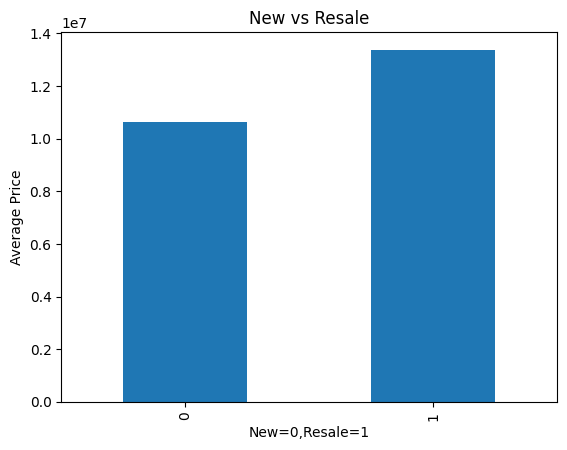

In [12]:
r_n = data.groupby('Resale')['Price'].mean()
r_n.plot(kind='bar')
plt.xlabel('New=0,Resale=1')
plt.ylabel('Average Price')
plt.title('New vs Resale')
plt.show()


### 12. Do houses with a swimming pool have higher prices?

In [21]:
data.groupby("SwimmingPool")["Price"].mean()

,Price
SwimmingPool,
0,8.571230e+06
1,1.288971e+07
9,1.227084e+07


###13. How does number of bedrooms impact price?

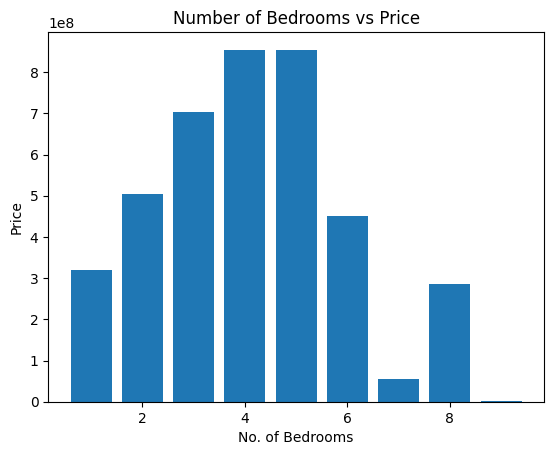

In [ ]:
plt.bar(data['No. of Bedrooms'],data['Price'])
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()


### Summary

--> The dataset has 32,963 rows and 40 columns.

--> The most common locations are New Town, Kharghar, Thane West, Mira Road East and Rajarhat.

--> Prices repeat most often in Lane Johri Farm, Sector Dwarka, 15th Road, Feet Radial Road and Dwarka Sector 9 Road.

--> The highest average house prices are found in Sundar Nagar, Mansarovar Garden, MG Road, Sector 53 and Dwarka New Delhi.

--> Devli has the highest price per square foot.

--> Area and number of bedrooms show the strongest correlation with price, meaning bigger homes with more bedrooms usually cost more.


### Machine Learning Models

### 1. Build a Simple Linear Regression model to predict the Sale price of the house.Use Area as the independent variable

In [ ]:
X = data[['Area']]
y = data[['Price']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
lrm = LinearRegression()

In [ ]:
lrm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lrm.predict(X_test)

In [ ]:
r2_Linear = r2_score(y_test,y_pred)

In [ ]:
r2_Linear

0.09569329056977072

###2. Build Multiple Linear Regression model to predict Sale price of the house.

In [ ]:

X1 = data.drop(columns=['Location','Price'],axis=1)

In [ ]:
y1 = data[['Price']]

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

In [ ]:
lrm.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
y1_pred = lrm.predict(X1_test)

In [ ]:
r2_Multi_Linear = r2_score(y1_test,y1_pred)

In [ ]:
r2_Multi_Linear

0.1314532464042445

###3. Build Multiple Linear Regression model to predict Sale price of the house.

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X1_train)

In [ ]:
lrm.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
y_m = lrm.predict(X1_test)

In [ ]:
r2_multi_linear_PCA = r2_score(y1_test,y_m)

In [ ]:
r2_multi_linear_PCA

0.1314532464042445

###4. Build a model using Lasso and Ridge regression to reduce model complexity.

In [ ]:
#Lasso regression

In [ ]:
lls = Lasso(alpha=0.1)
lls.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.424e+18, tolerance: 1.416e+15
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [ ]:
y_lasso= lls.predict(X1_test)

In [ ]:
r2_score_lasso = r2_score(y1_test,y_lasso)

In [ ]:
r2_score_lasso

0.13023139763158353

In [ ]:
# ridge regression


In [ ]:
rid = Ridge(alpha=0.1)
rid.fit(X1_train,y1_train)

Ridge(alpha=0.1)

In [ ]:
y_ridge = rid.predict(X1_test)

In [ ]:
r2_Ridge = r2_score(y1_test,y_ridge)

In [ ]:
r2_Ridge

0.13145289180855502

###5. Build an SVR model to predict Sale price of the house.

In [ ]:
svr = SVR(kernel='rbf', C=10, epsilon=0.1)

In [ ]:
svr.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10)

In [ ]:
y_svr = svr.predict(X1_test)

In [ ]:
r2_svr = r2_score(y1_test,y_svr)

In [ ]:
r2_svr

-0.050284184540920984

###6. Build Decision Tree Regressor to predict Sale price of the house.

In [ ]:
dcr1 = DecisionTreeRegressor()

In [ ]:
dcr1.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [ ]:
y_dcr1 = dcr1.predict(X1_test)

In [ ]:
r2_dcr1 = r2_score(y1_test,y_dcr1)

In [ ]:

r2_dcr1

-0.21944851903415707

###7. Build Random Forest Regression model to predict Sale price of the house.

In [ ]:
rlc = RandomForestRegressor(n_estimators=100)

In [ ]:
rlc.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_rlc = rlc.predict(X1_test)

In [ ]:
r2_rlc = r2_score(y1_test,y_rlc)

In [ ]:
r2_rlc

0.085576962472382

###8. Use GridsearchCV and RandomizedsearchCV for tuning hyperparameters and fit your model on the optimal parameters.

### SVR

In [ ]:
# SVR Randomized SearchCV
param = {
    'kernel': ['rbf','linear'],'C': [0.5,1,5,10],'gamma': ['scale','auto']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=svr,param_distributions=param,n_iter=3,cv=2,n_jobs=-1,random_state=42,scoring='neg_mean_squared_error'
)


In [ ]:
random_search.fit(X1_train,y1_train)
print(random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'kernel': 'linear', 'gamma': 'scale', 'C': 1}


In [ ]:
svr1 = SVR(kernel='linear',C=1.0,gamma='scale')
svr1.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
pred_sv = svr1.predict(X1_test)

In [ ]:
r2_svr_rnd = r2_score(y1_test,pred_sv)

In [ ]:
r2_svr_rnd

0.05236068273519545

###Decision Tree

In [ ]:
dcr1 = DecisionTreeRegressor()

In [ ]:
# Decision Tree Randomized SearchCV
param_d = {'max_depth':[5,10,20,30],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,2,4,8],'splitter':['best','random'],'max_features':['sqrt','log2']
}

In [ ]:
ran_tree = RandomizedSearchCV(estimator=dcr1,param_distributions=param_d,n_iter=10,cv=2,scoring='neg_mean_squared_error',n_jobs=-1,random_state=42
)

In [ ]:
ran_tree.fit(X1_train,y1_train)
print(ran_tree.best_params_)

{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
dcr = DecisionTreeRegressor(splitter='best',min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=30)

In [ ]:
dcr.fit(X1_train,y1_train)

DecisionTreeRegressor(max_depth=30, max_features='log2', min_samples_split=10)

In [ ]:
y_dcr = dcr.predict(X1_test)

In [ ]:
r2_dcr_rnd = r2_score(y1_test,y_dcr)

In [ ]:
r2_dcr_rnd

-0.07277793463753679

In [ ]:
# Decision Tree Grid SearchCV
param_tree = {'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2'],'splitter': ['best', 'random']
}

In [ ]:
grid_tree = GridSearchCV(estimator=dcr1,param_grid=param_tree,cv=2,scoring='neg_mean_squared_error',n_jobs=-1
)

In [ ]:
grid_tree.fit(X1_train,y1_train)
print(grid_tree.best_params_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


In [ ]:
dcr2 = DecisionTreeRegressor(max_depth=10,max_features=None,min_samples_leaf=4,min_samples_split=10,splitter='random')

In [ ]:
dcr2.fit(X1_train,y1_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      splitter='random')

In [ ]:
y_dcr2 = dcr2.predict(X1_test)

In [ ]:
r2_dcr2_grid = r2_score(y1_test,y_dcr2)

In [ ]:

r2_dcr2_grid

0.18355961617856176

### Random Forest

In [ ]:
# random forest using randomized search cv

In [ ]:
rf1 = RandomForestRegressor()

param_rf = {'n_estimators': [100, 150, 200, 250],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['sqrt', 'log2', None],
}


In [ ]:

random_search = RandomizedSearchCV(estimator=rf1,param_distributions=param_rf,n_iter=10,cv=2,scoring='neg_mean_squared_error',n_jobs=-1,
)


In [ ]:

random_search.fit(X1_train, y1_train)
print(random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
rfr = RandomForestRegressor(n_estimators=200,min_samples_leaf=2,min_samples_split=5,max_features=None,max_depth=20)

In [ ]:
rfr.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200)

In [ ]:
y_rfr = rfr.predict(X1_test)

In [ ]:
r2_rfr_rnd = r2_score(y1_test,y_rfr)

In [ ]:
r2_rfr_rnd

0.1444968323722613

In [ ]:
# random forset GridSearchCV

In [ ]:
rfr2 = RandomForestRegressor(random_state=42)

In [ ]:

param_rfr1 = {'n_estimators': [100, 150, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2],'max_features': ['sqrt', 'log2'],
}

In [ ]:
grid_rfr = GridSearchCV(
    estimator=rfr2,
    param_grid=param_rfr1,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


In [ ]:
grid_rfr.fit(X1_train, y1_train)
print(grid_rfr.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rfr2 = RandomForestRegressor(n_estimators=200,min_samples_leaf=2,min_samples_split=2,max_features='sqrt',max_depth=10)

In [ ]:
rfr2.fit(X1_train,y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200)

In [ ]:
y_rfr2 = rfr.predict(X1_test)

In [ ]:
r2_rfr2_grid = r2_score(y1_test,y_rfr2)

In [ ]:
r2_rfr2_grid

0.1444968323722613

###9. Model Selection: Evaluate and compare performance of all the models to find the best model

In [ ]:
models = {
    'Linear Regression Model':r2_Linear,
    'Multiple Linear Regression Model':r2_Multi_Linear,
    'Multiple Linear Regression Model using PCA':r2_multi_linear_PCA,
    'Lasso Regression Model':r2_score_lasso,
    'Ridge Regression Model':r2_Ridge,
    'Support Vector Regression Model':r2_svr,
    'Support Vector Regression Model using randomized search':r2_svr_rnd,
    'Decision Tree Regression Model':r2_dcr1,
    'Decision Tree Regression Model using randomized search':r2_dcr_rnd,
    'Decision Tree Regression Model using grid search':r2_dcr2_grid,
    'Random Forest Regression Model':r2_rlc,
    'Random Forest Regression Model using randomized search':r2_rfr_rnd,
    'Random Forest Regression Model using grid search':r2_rfr2_grid}

In [ ]:
model_names = list(models.keys())
scores = list(models.values())

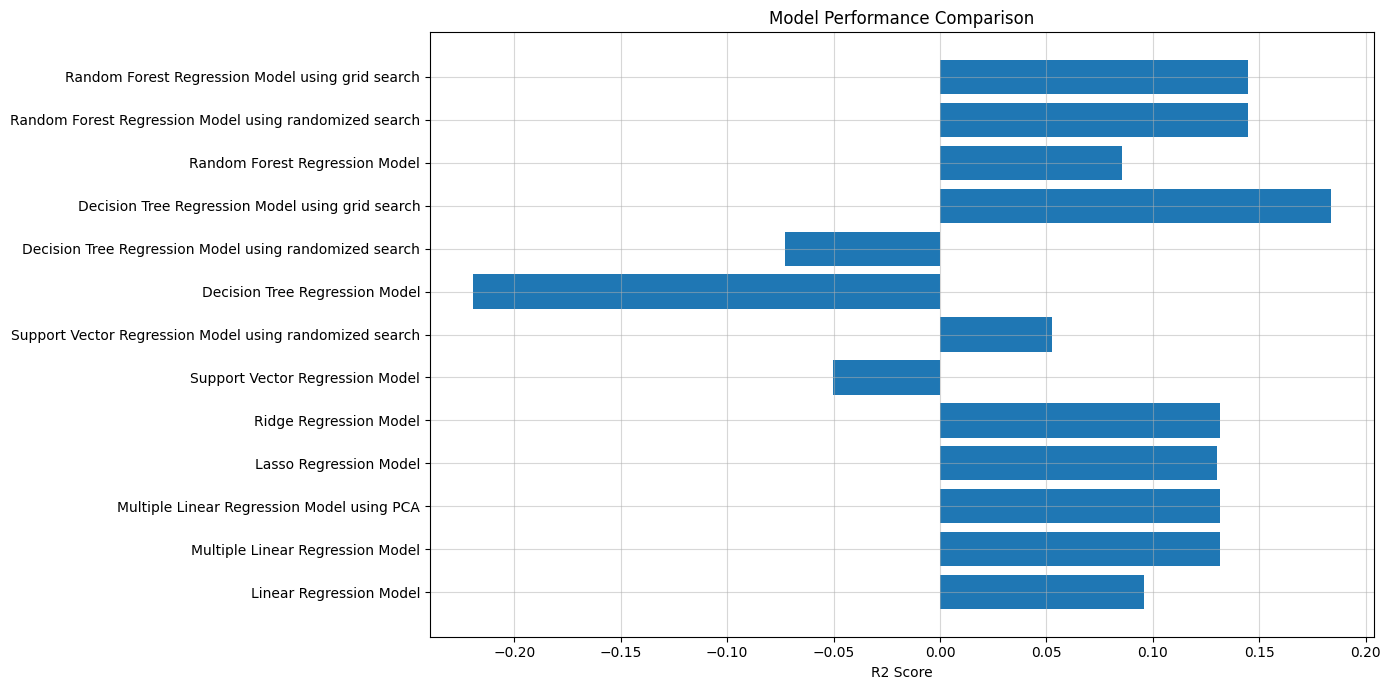

In [ ]:
plt.barh(model_names, scores)
plt.xlabel('R2 Score')
plt.title('Model Performance Comparison')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
best_model = max(models,key=models.get)

In [ ]:
print(best_model,models[best_model])

Decision Tree Regression Model using grid search 0.18355961617856176


### --> The best-performing model is the Decision Tree Regression model, with hyperparameters tuned using GridSearchCV.